# 1. Probabilidad Discreta

## 1.1 Introducción a la probabilidad discreta

### Probabilidad discreta

Notación:

Usamos $P(A)$ para denotar la probabilidad de que suceda evento 𝐴. Usamos el término general evento para referirnos a cosas que pueden suceder cuando algo ocurre por casualidad.

Supongamos que tenemos una bolsa con canicas, en este caso 2 rojas y 3 azules:

La probabilidad de elegir una canica de algún color se define como

$$
P(\text{Canica}_{Color}) = \frac{\text{Cantidad de canicas}_{color}}{\text{Total de canicas}}
$$

### Monte Carlo Simulations

Las computadoras ofrecen una forma de realizar el experimento aleatorio sencillo descrito anteriormente: elegir una canica al azar de una urna que contiene tres canicas azules y dos rojas. Los generadores de números aleatorios nos permiten imitar el proceso de escoger al azar.

Para ello utilizamos la función sample en R

In [1]:
# comenzamos creando la bolsa de canicas
canicas <- rep(c("roja", "azul"), times = c(2, 3))

# Observamos el contenido de la bolsa
canicas

# utilizamos la función sample para escoger una al azar
sample(canicas, 1)


[1] "roja" "roja" "azul" "azul" "azul"

[1] "azul"

Esta línea de código produce un resultado aleatorio. Queremos repetir este experimento un número infinito de veces, pero es imposible repetirlo para siempre. Sin embargo, podemos repetir el experimento un número suficientemente grande de veces para que los resultados sean prácticamente equivalentes a repetirlo para siempre. Este es un ejemplo de una simulación Monte Carlo.

Para realizar nuestra primera simulación Monte Carlo, utilizamos la función replicate, que nos permite repetir la misma tarea varias veces. Aquí, repetimos el evento aleatorio $𝐵 = 10000$ veces:

In [2]:
b <- 10000
eventos <- replicate(b, sample(canicas, 1))

# usaremos table para ver la distribución
tab <- table(eventos)

# Mostramos las proporciones
prop.table(tab)


eventos
  azul   roja 
0.6019 0.3981 

Los números anteriores son probabilidades estimadas proveídas por una simulación Monte Carlo. La teoría estadística, que no discutimos aquí, nos dice que en lo que 𝐵 se hace más grande, las estimaciones se acercan a $3/5 = 0.6$ y $2/5 = 0.4$.

La función sample tiene un argumento que nos permite elegir más de un elemento de la urna. Sin embargo, por defecto, esta selección ocurre sin reemplazo; es decir, después de seleccionar una canica, no se vuelve a colocar en la urna.

Sin embargo, la función sample se puede usar directamente, sin el uso de replicate, para repetir el mismo experimento de elegir 1 de las 5 canicas, continuamente, en las mismas condiciones. Para hacer esto, muestreamos con reemplazo; es decir, se devuelve la canica a la urna después de seleccionarla. Podemos decirle a sample que haga esto cambiando el argumento replace, que por defecto es `FALSE`, a `replace = TRUE`:

In [3]:
# utilizando replace
events <- sample(canicas, b, replace = TRUE)
prop.table(table(events))


events
  azul   roja 
0.5943 0.4057 

****Setting the Random Seed:****

```r
set.seed(1986)
```

Al trabajar con números aleatorios los resultados pueden variar. Sin embargo, si queremos asegurarnos de que los resultados sean los mismos cada vez que se ejecuten podemos fijar la semilla (seed en inglés) de generación de números aleatorios de R en un número específico. Arriba la fijamos en 1986. Queremos evitar usar la misma semilla cada vez. Una forma popular de escoger la semilla es restando el mes y el día del año. Por ejemplo, para el 20 de diciembre de 2018 fijamos la semilla en $1986: 2018 − 12 − 20 = 1986.$

### Probability Distributions

Si conocemos la frecuencia relativa de las diferentes categorías, podemos definir una distribución para resultados categóricos, asignando una probabilidad a cada categoría 

Si estamos llamando al azar a votantes probables de una población que es 44% demócratas, 44% republicanos, 10% indecisos y 2% del partido verde, estas proporciones definen la probabilidad para cada grupo. La distribución de probabilidad es:

| P(elegir un republicano) | 0.44 |
| --- | --- |
| P(elegir un demócrata) | 0.44 |
| P(elegir un indeciso) | 0.10 |
| P(elegir un verde) | 0.02 |

### Independence

Decimos que dos eventos son independientes si el resultado de uno no afecta al otro. El ejemplo clásico es el lanzamiento de monedas. Cada vez que lanzamos una moneda, la probabilidad de ver cara es 1/2, independientemente de los resultados de lanzamientos anteriores. Lo mismo es cierto cuando recogemos canicas de una urna con reemplazo. En el ejemplo anterior, la probabilidad de rojo es 0.40 independientemente de las selecciones anteriores.

#### Probabilidades condicionales:

Cuando los eventos no son independientes, las probabilidades condicionales son útiles. Ya vimos un ejemplo de una probabilidad condicional: calculamos la probabilidad de que una segunda carta repartida sea K dado que la primera fue K. En la probabilidad, usamos la
siguiente notación:

$$
P(\text{Segunda carta sea Rey}|\text{Primer carta es Rey}) = \frac{3}{51} 
$$

Utilizamos | como abreviatura de “dado que”

Cuando dos eventos A y B son independientes tendremos:

$$
P(A|B) = P(A)
$$

Esta es la forma matemática de decir: el hecho de que 𝐵 sucedió no afecta la probabilidad de que 𝐴 suceda. De hecho, esto puede considerarse la definición matemática de independencia

#### Regla de multiplicación:

Si queremos saber la probabilidad de que ocurran dos eventos, digamos 𝐴 y 𝐵, podemos usar la regla de la multiplicación:

$$
P(A \: y \: B) = P(A)P(A|B)
$$

Podemos por inducción incluir mas eventos

$$
P(A \: y \: B \: y \: C) = P(A)P(A|B)P(C|A\:y\:B)
$$

Cuando tenemos eventos independientes, la regla de la multiplicación se hace más sencilla:

$$
P(A \: y \: B \: y \: C) = P(A)P(B)P(C)
$$

Debemos tener mucho cuidado antes de usar esto ya que suponer independencia cuando realmente no existe puede resultar en cálculos de probabilidad muy diferentes e incorrectos.

## 1.2. Combinations and Permutations

¿Cuál es la probabilidad de que si escojo cinco cartas sin reemplazo, obtenga todas cartas del mismo palo (suit en inglés), lo que se conoce como “flush” en el poker?

Primero, construyamos una baraja de cartas. Para esto, usaremos las funciones `expand.grid` y `paste`. Usamos paste para crear cadenas uniendo cadenas más pequeñas. Para hacer esto, tomamos el número y el palo de una carta y creamos el nombre de la carta de esta manera:

In [4]:
# creamos la baraja
suits <- c("Diamonds", "Clubs", "Hearts", "Spades")
numbers <- c(
    "Ace", "Deuce", "Three", "Four", "Five", "Six", "Seven",
    "Eight", "Nine", "Ten", "Jack", "Queen", "King"
)
deck <- expand.grid(number = numbers, suit = suits)
deck <- paste(deck$number, deck$suit)


Con la baraja construida, podemos verificar que la probabilidad de que una K sea la primera carta es 1/13 calculando la proporción de posibles resultados que satisfagan nuestra condición:

In [5]:
# verificamos la probabilidad de obtener rey
kings <- paste("King", suits)
mean(deck %in% kings)


[1] 0.07692308

Ahora, ¿qué tal la probabilidad condicional de que la segunda carta sea una K dado que la primera era una K? Anteriormente, dedujimos que si una K ya está fuera de la baraja y quedan 51 cartas, entonces la probabilidad es 3/51. Confirmemos enumerando todos los resultados posibles.
Para hacer esto, podemos usar la función permutations del paquete `gtools`. Para cualquier lista de tamaño n, esta función calcula todas las diferentes combinaciones que podemos obtener cuando seleccionamos r artículos.

### Permutaciones

Para calcular todas las formas posibles en que podemos elegir dos cartas cuando el orden importa, escribimos:

In [6]:
# calculamos las formas de elegir dos cartas cuando el orden importa
# install.packages("gtools") # install gtools package
library(gtools) # load gtools package
hands <- permutations(52, 2, v = deck)


Esta es una matriz con dos columnas y 2652 filas. Con una matriz podemos obtener la primera y segunda carta así:

In [7]:
first_card <- hands[, 1]
second_card <- hands[, 2]
first_card
second_card


[1] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Clubs"     
   [5] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Clubs"     
   [9] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Clubs"     
  [13] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Clubs"     
  [17] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Clubs"     
  [21] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Clubs"     
  [25] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Clubs"     
  [29] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Clubs"     
  [33] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Clubs"     
  [37] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Clubs"     
  [41] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Clubs"     
  [45] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Clubs"     
  [49] "Ace Clubs"      "Ace Clubs"      "Ace Clubs"      "Ace Diamonds"  
  [53] "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"  
  [57] "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"  
  [61] "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"  
  [65] "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"  
  [69] "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"  
  [73] "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"  
  [77] "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"  
  [81] "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"  
  [85] "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"  
  [89] "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"  
  [93] "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"  
  [97] "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"   "Ace Diamonds"  
 [101] "Ace Diamonds"   "Ace Diamonds"   "Ace Hearts"     "Ace Hearts"    
 [105] "Ace Hearts"     "Ace Hearts"     "Ace Hearts"     "Ace Hearts"    
 [109] "Ace Hearts"     "Ace Hearts"     "Ace Hearts"     "Ace Hearts"    
 [113] "Ace Hearts"     "Ace Hearts"     "Ace Hearts"     "Ace Hearts"    
 [117] "Ace Hearts"     "Ace Hearts"     "Ace Hearts"     "Ace Hearts"    
 [121] "Ace Hearts"     "Ace Hearts"     "Ace Hearts"     "Ace Hearts"    
 [125] "Ace Hearts"     "Ace Hearts"     "Ace Hearts"     "Ace Hearts"    
 [129] "Ace Hearts"     "Ace Hearts"     "Ace Hearts"     "Ace Hearts"    
 [133] "Ace Hearts"     "Ace Hearts"     "Ace Hearts"     "Ace Hearts"    
 [137] "Ace Hearts"     "Ace Hearts"     "Ace Hearts"     "Ace Hearts"    
 [141] "Ace Hearts"     "Ace Hearts"     "Ace Hearts"     "Ace Hearts"    
 [145] "Ace Hearts"     "Ace Hearts"     "Ace Hearts"     "Ace Hearts"    
 [149] "Ace Hearts"     "Ace Hearts"     "Ace Hearts"     "Ace Hearts"    
 [153] "Ace Hearts"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [157] "Ace Spades"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [161] "Ace Spades"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [165] "Ace Spades"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [169] "Ace Spades"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [173] "Ace Spades"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [177] "Ace Spades"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [181] "Ace Spades"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [185] "Ace Spades"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [189] "Ace Spades"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [193] "Ace Spades"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [197] "Ace Spades"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [201] "Ace Spades"     "Ace Spades"     "Ace Spades"     "Ace Spades"    
 [205] "Deuce Clubs"    "Deuce Clubs"    "Deuce Clubs"    "Deuce Clubs"   
 [209] "Deuce Clubs"    "Deuce Clubs"    "Deuce Clubs"    "Deuce Clubs"   
 [213] "Deuce Clubs"    "Deu

[1] "Ace Diamonds"   "Ace Hearts"     "Ace Spades"     "Deuce Clubs"   
   [5] "Deuce Diamonds" "Deuce Hearts"   "Deuce Spades"   "Eight Clubs"   
   [9] "Eight Diamonds" "Eight Hearts"   "Eight Spades"   "Five Clubs"    
  [13] "Five Diamonds"  "Five Hearts"    "Five Spades"    "Four Clubs"    
  [17] "Four Diamonds"  "Four Hearts"    "Four Spades"    "Jack Clubs"    
  [21] "Jack Diamonds"  "Jack Hearts"    "Jack Spades"    "King Clubs"    
  [25] "King Diamonds"  "King Hearts"    "King Spades"    "Nine Clubs"    
  [29] "Nine Diamonds"  "Nine Hearts"    "Nine Spades"    "Queen Clubs"   
  [33] "Queen Diamonds" "Queen Hearts"   "Queen Spades"   "Seven Clubs"   
  [37] "Seven Diamonds" "Seven Hearts"   "Seven Spades"   "Six Clubs"     
  [41] "Six Diamonds"   "Six Hearts"     "Six Spades"     "Ten Clubs"     
  [45] "Ten Diamonds"   "Ten Hearts"     "Ten Spades"     "Three Clubs"   
  [49] "Three Diamonds" "Three Hearts"   "Three Spades"   "Ace Clubs"     
  [53] "Ace Hearts"     "Ace Spades"     "Deuce Clubs"    "Deuce Diamonds"
  [57] "Deuce Hearts"   "Deuce Spades"   "Eight Clubs"    "Eight Diamonds"
  [61] "Eight Hearts"   "Eight Spades"   "Five Clubs"     "Five Diamonds" 
  [65] "Five Hearts"    "Five Spades"    "Four Clubs"     "Four Diamonds" 
  [69] "Four Hearts"    "Four Spades"    "Jack Clubs"     "Jack Diamonds" 
  [73] "Jack Hearts"    "Jack Spades"    "King Clubs"     "King Diamonds" 
  [77] "King Hearts"    "King Spades"    "Nine Clubs"     "Nine Diamonds" 
  [81] "Nine Hearts"    "Nine Spades"    "Queen Clubs"    "Queen Diamonds"
  [85] "Queen Hearts"   "Queen Spades"   "Seven Clubs"    "Seven Diamonds"
  [89] "Seven Hearts"   "Seven Spades"   "Six Clubs"      "Six Diamonds"  
  [93] "Six Hearts"     "Six Spades"     "Ten Clubs"      "Ten Diamonds"  
  [97] "Ten Hearts"     "Ten Spades"     "Three Clubs"    "Three Diamonds"
 [101] "Three Hearts"   "Three Spades"   "Ace Clubs"      "Ace Diamonds"  
 [105] "Ace Spades"     "Deuce Clubs"    "Deuce Diamonds" "Deuce Hearts"  
 [109] "Deuce Spades"   "Eight Clubs"    "Eight Diamonds" "Eight Hearts"  
 [113] "Eight Spades"   "Five Clubs"     "Five Diamonds"  "Five Hearts"   
 [117] "Five Spades"    "Four Clubs"     "Four Diamonds"  "Four Hearts"   
 [121] "Four Spades"    "Jack Clubs"     "Jack Diamonds"  "Jack Hearts"   
 [125] "Jack Spades"    "King Clubs"     "King Diamonds"  "King Hearts"   
 [129] "King Spades"    "Nine Clubs"     "Nine Diamonds"  "Nine Hearts"   
 [133] "Nine Spades"    "Queen Clubs"    "Queen Diamonds" "Queen Hearts"  
 [137] "Queen Spades"   "Seven Clubs"    "Seven Diamonds" "Seven Hearts"  
 [141] "Seven Spades"   "Six Clubs"      "Six Diamonds"   "Six Hearts"    
 [145] "Six Spades"     "Ten Clubs"      "Ten Diamonds"   "Ten Hearts"    
 [149] "Ten Spades"     "Three Clubs"    "Three Diamonds" "Three Hearts"  
 [153] "Three Spades"   "Ace Clubs"      "Ace Diamonds"   "Ace Hearts"    
 [157] "Deuce Clubs"    "Deuce Diamonds" "Deuce Hearts"   "Deuce Spades"  
 [161] "Eight Clubs"    "Eight Diamonds" "Eight Hearts"   "Eight Spades"  
 [165] "Five Clubs"     "Five Diamonds"  "Five Hearts"    "Five Spades"   
 [169] "Four Clubs"     "Four Diamonds"  "Four Hearts"    "Four Spades"   
 [173] "Jack Clubs"     "Jack Diamonds"  "Jack Hearts"    "Jack Spades"   
 [177] "King Clubs"     "King Diamonds"  "King Hearts"    "King Spades"   
 [181] "Nine Clubs"     "Nine Diamonds"  "Nine Hearts"    "Nine Spades"   
 [185] "Queen Clubs"    "Queen Diamonds" "Queen Hearts"   "Queen Spades"  
 [189] "Seven Clubs"    "Seven Diamonds" "Seven Hearts"   "Seven Spades"  
 [193] "Six Clubs"      "Six Diamonds"   "Six Hearts"     "Six Spades"    
 [197] "Ten Clubs"      "Ten Diamonds"   "Ten Hearts"     "Ten Spades"    
 [201] "Three Clubs"    "Three Diamonds" "Three Hearts"   "Three Spades"  
 [205] "Ace Clubs"      "Ace Diamonds"   "Ace Hearts"     "Ace Spades"    
 [209] "Deuce Diamonds" "Deuce Hearts"   "Deuce Spades"   "Eight Clubs"   
 [213] "Eight Diamonds" "Eig

In [8]:
# Casos donde K es la primera carta
kings <- paste("King", suits)
sum(first_card %in% kings)


[1] 204

Para obtener la probabilidad condicional, calculamos qué fracción de estos tiene una K como la segunda carta:

In [9]:
# Utilizando sum
sum(first_card %in% kings & second_card %in% kings) / sum(first_card %in% kings)
# Utilizando mean
mean(first_card %in% kings & second_card %in% kings) / mean(first_card %in% kings)


[1] 0.05882353

[1] 0.05882353

LA versión con `mean` es la versión de R de:
$$
P(A|B)= \frac{P(A \: y\:B)}{P(A)}
$$

### Combinaciones

Cuando el orden no importa 

Por ejemplo, en Blackjack, si le dan un As y una carta  de figura como su primera mano, se llama un Natural 21 y ganan automáticamente. Si quisiéramos calcular la probabilidad de que esto suceda, enumeraríamos las *combinaciones*, no las permutaciones, ya que el orden no importa.

Entonces, para calcular la probabilidad de un Natural 21, podemos hacer esto:

In [10]:
aces <- paste("Ace", suits)

facecard <- c("King", "Queen", "Jack", "Ten")
facecard <- expand.grid(number = facecard, suit = suits)
facecard <- paste(facecard$number, facecard$suit)

hands <- combinations(52, 2, v = deck)
mean(hands[,1] %in% aces & hands[,2] %in% facecard)

[1] 0.04826546

In [11]:
# Utilizando simulaciones de montecarlo

# Función para simular un juego de blackjack
blackjack <- function(){
	hand <- sample(deck, 2)
	(hand[1] %in% aces & hand[2] %in% facecard) |
		(hand[2] %in% aces & hand[1] %in% facecard)
}
B <- 10000 # Número de simulaciones
resultados <- replicate(B, blackjack()) # Simulamos B juegos
mean(resultados) # Calculamos la probabilidad

[1] 0.0466

### The Birthday Problem

¿Cuál es la probabilidad de que dos personas en una habitación tengan el mismo cumpleaños? Para simplificar, ignoraremos los años bisiestos y supondremos que todos los cumpleaños son igualmente probables.

In [12]:
# verificando si dos personas tienen la misma fecha de cumpleaños en un grupo de 50
n <- 50
bdays <- sample(1:365, n, replace = TRUE)    # generamos n cumpleaños aleatorios
any(duplicated(bdays))    # verificamos si tenemos duplicados

# simulación de Monte Carlo con B=10000 repeticiones
B <- 10000
results <- replicate(B, {    # retorna un vector con B valores lógicos
    bdays <- sample(1:365, n, replace = TRUE)
    any(duplicated(bdays))
})
mean(results)    # calcula la proporción de cumpleaños duplicados

[1] TRUE

[1] 0.971

¿Con un grupo de qué tamaño son las probabilidades superiores a 50%? ¿Superiores a 75%?
Empecemos creando una tabla de consulta. Rápidamente podemos crear una función para calcular esto para cualquier tamaño de grupo:

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."


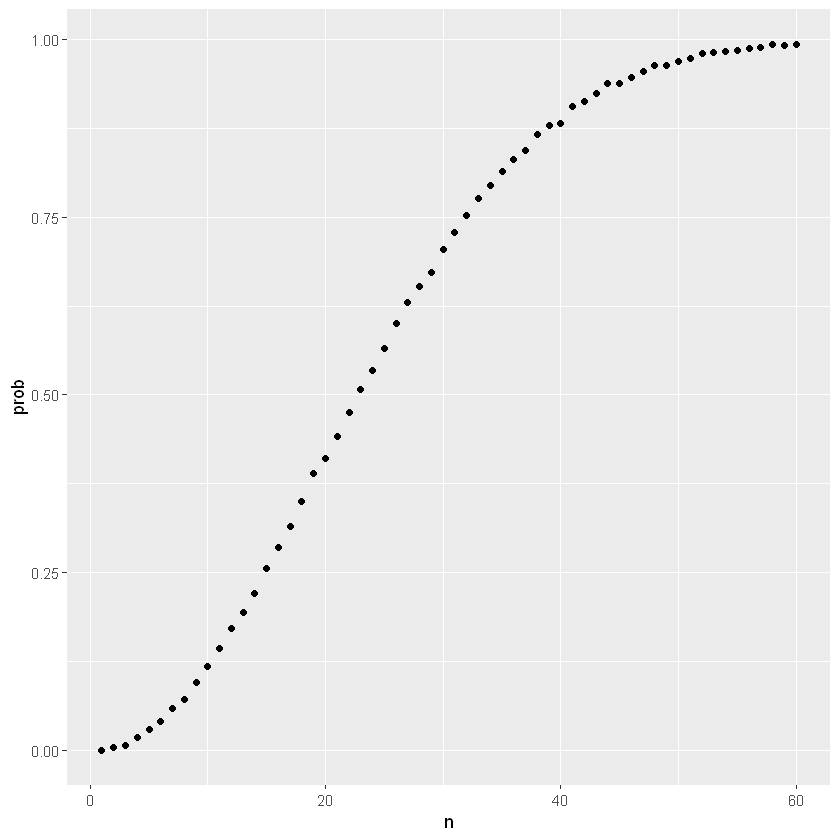

In [13]:
# para cualquier tamaño de grupo 
#convertimos el calculo en una función
same_birthday <- function(n){
    bdays <- sample(1:365, n, replace = TRUE)
    any(duplicated(bdays))
}
#creamos una tabla de consulta
compute_prob <- function(n, B = 10000){
    results <- replicate(B, same_birthday(n))
    mean(results)
}
#utilizamos la función sapply
n <- seq(1, 60)
prob <- sapply(n, compute_prob)
#realizamos un gráfico
#install.packages("tidyverse") instalamos el paquete
library(tidyverse)
prob <- sapply(n, compute_prob)
qplot(n, prob)

Ahora calculemos las probabilidades exactas en lugar de usar simulaciones Monte Carlo. No solo obtenemos la respuesta exacta usando matemáticas, sino que los cálculos son mucho más rápidos ya que no tenemos que generar experimentos.

las probabilidades de que todas las 50 personas tengan un cumpleaños único son:

$$
1(\frac{364}{365})(\frac{363}{365})(\frac{362}{365})...(\frac{365-n+1}{365})
$$

Podemos escribir una función que haga esto para cualquier número:

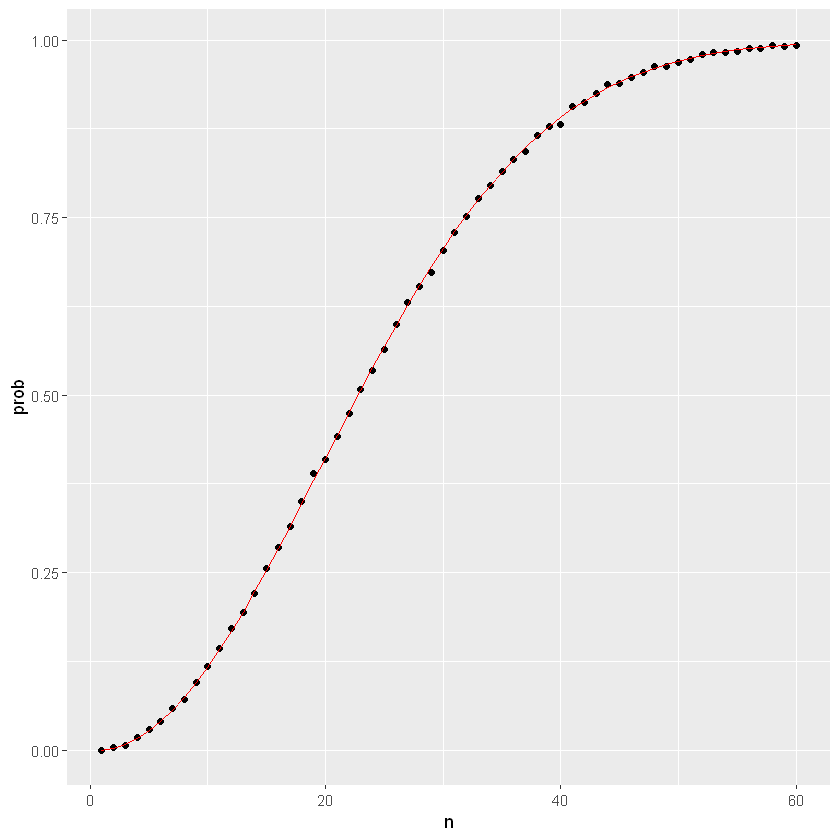

In [14]:
# probabilidad exacta
exact_prob <- function(n){
    prob_unique <- seq(365,365-n+1)/365
    1 - prod( prob_unique)
}
eprob <- sapply(n, exact_prob)
qplot(n, prob) + geom_line(aes(n, eprob), col = "red")


El gráfico muestra que la simulación Monte Carlo ofrece una muy buena estimación de la probabilidad exacta. Si no hubiera sido posible calcular las probabilidades exactas, aún habríamos podido estimar con precisión las probabilidades.

### ****How many Monte Carlo experiments are enough?****

La teoría descrita aquí requiere repetir experimentos una y otra vez para siempre. En la práctica no podemos hacer esto. En los ejemplos anteriores, utilizamos `𝐵 = 10, 000` experimentos Monte Carlo y resultó que esto nos dio estimados precisos. Cuanto mayor sea este número, más preciso será el estimado hasta que la aproximación sea tan buena que sus computadoras no podrán notar la diferencia. Pero en cálculos más complejos, 10,000 puede ser insuficiente. Además, para algunos cálculos, 10,000 experimentos podrían no ser computacionalmente factibles. En la práctica, no sabremos cuál es la respuesta, por lo que no sabremos si nuestra estimación Monte Carlo es precisa. Sabemos que entre más grande sea 𝐵, mejor será la aproximación. ¿Pero cuán grande necesitamos que sea? Esta es realmente una pregunta desafiante y frecuentemente contestarla requiere una formación avanzada en estadística teórica.
Un enfoque práctico que describiremos aquí es verificar la estabilidad del estimado. A continuación ofrecemos un ejemplo con el problema de cumpleaños para un grupo de 25 personas.

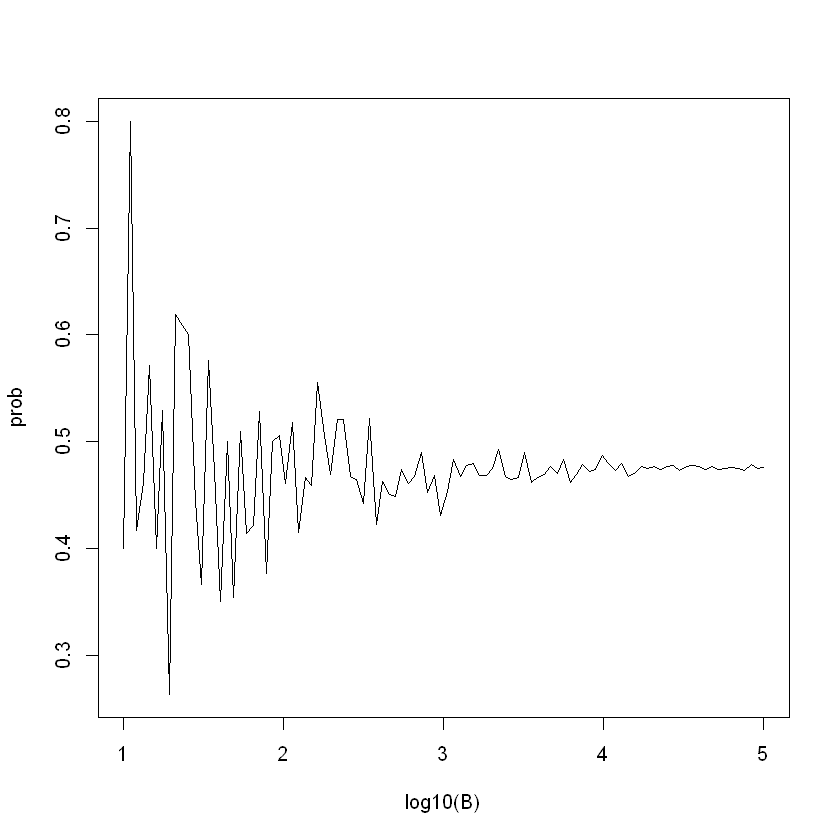

In [15]:
B <- 10^seq(1, 5, len = 100)    # definimos el vector con valores de B
compute_prob <- function(B, n = 22){    # corremos la función para cada B
	same_day <- replicate(B, {
    	bdays <- sample(1:365, n, replace = TRUE)
        any(duplicated(bdays))
    })
    mean(same_day)
}
# aplicamos compute_prob a varios valores de B
prob <- sapply(B, compute_prob)
 # Graficamos la linea de las estimaciones
plot(log10(B), prob, type = "l")

En este gráfico, podemos ver que los valores comienzan a estabilizarse (es decir, varían menos de .01) alrededor de 1000. Noten que la probabilidad exacta, que en este caso sabemos, es 0.569.

## 1.3. Addition Rule and Monty Hall

### regla de la adición

La regla de la adición nos dice que:

$P(𝐴 \:o\: 𝐵) = P(𝐴) + P(𝐵) − P(𝐴 \:y\: 𝐵)$
Esta regla es intuitiva: piense en un diagrama de Venn. Si simplemente sumamos las probabilidades, contamos la intersección dos veces, por lo que debemos restar una instancia.

### Problema Monty Hall

En la década de 1970 en EE.UU, hubo un programa de concursos llamado “Let’s Make a Deal” y Monty Hall era el anfitrión. En algún momento del juego, se le pedía al concursante que eligiera una de tres puertas. Detrás de una puerta había un premio, mientras que detrás de las otras puertas tenían una cabra que señalaba que el concursante había perdido. Después de que el concursante eligiera una puerta y antes de revelar si esa puerta contenía un premio,
Monty Hall abría una de las otras dos puertas y le mostraba al concursante que no había  ningún premio detrás de esa puerta. Luego le preguntaba al concursante: “¿Quiere cambiar de puerta?”

Podemos usar la probabilidad para mostrar que si se quedan con la opción de la puerta original, sus probabilidades de ganar un premio siguen siendo 1 en 3. Sin embargo, si cambian a la otra puerta, ¡sus probabilidades de ganar duplican a 2 en 3! Esto parece contradictorio.
Muchas personas piensan incorrectamente que ambas probabilidades son 1 en 2 ya que uno elige entre 2 opciones.

A continuación, usamos una simulación Monte Carlo para ver qué estrategia es mejor.

Comencemos con la estrategia de no cambiar de puerta:

In [16]:
# Estrategia de mantener
B <- 10000
mantener <- replicate(B, {
    puertas <- as.character(1:3)
    #colocamos los premios de manera aleatoria
    premio <- sample(c("carro", "cabra", "cabra"))
    premio_puerta <- puertas[premio == "carro"] #la puerta que tiene el premio
    mi_eleccion <- sample(puertas, 1) #puerta elegida
     #puerta abierta
    muestra <- sample(puertas[!puertas %in% c(mi_eleccion, premio_puerta)],1)
    mantener <- mi_eleccion #mantenemos la puerta elegida
    mantener == premio_puerta #verificamos si esta el premio
})
mean(mantener) #probabilidad si mantenemos la puerta

[1] 0.3371

In [17]:
# Estrategia de cambiar
B <- 10000
cambiar <- replicate(B, {
    puertas <- as.character(1:3)
    #colocamos los premios de manera aleatoria
    premio <- sample(c("carro", "cabra", "cabra"))
    premio_puerta <- puertas[premio == "carro"] #la puerta que tiene el premio
    mi_eleccion <- sample(puertas, 1) #puerta elegida
     #puerta abierta
    muestra <- sample(puertas[!puertas %in% c(mi_eleccion, premio_puerta)],1)
    #cambiamos la puerta
    cambiar <- puertas[!puertas %in% c(mi_eleccion, muestra)]
    cambiar == premio_puerta #verificamos si esta el premio
})
mean(cambiar) #probabilidad si mantenemos la puerta

[1] 0.6633